- Name: Santos, Tristan Neal U.
- Section: CPE32S9
- Activity: 11.1
- Date: 05-11-2024

Given an IBM stocks dataset between 2006 to 2018. You are task to do the following:

- Load the dataset and examine it.
- Check for missing values.
- Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)
- Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.
- LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.
- Reshape the X_train for efficient modeling








- Load the dataset and examine it.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load time series dataset
series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/IBM_2006-01-01_to_2018-01-01.csv', header=0, index_col=0)
#Example of loading a dataset as a Pandas DataFrame

series_df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2022-01-01,150.0,152.5,148.5,151.5,1000,Company A
2022-01-02,151.5,154.2,149.8,152.8,1500,Company A
2022-01-03,152.0,152.8,151.2,151.2,1200,Company A
2022-01-04,153.2,153.5,151.5,152.0,1800,Company A
2022-01-05,152.8,153.0,151.2,151.5,2000,Company A


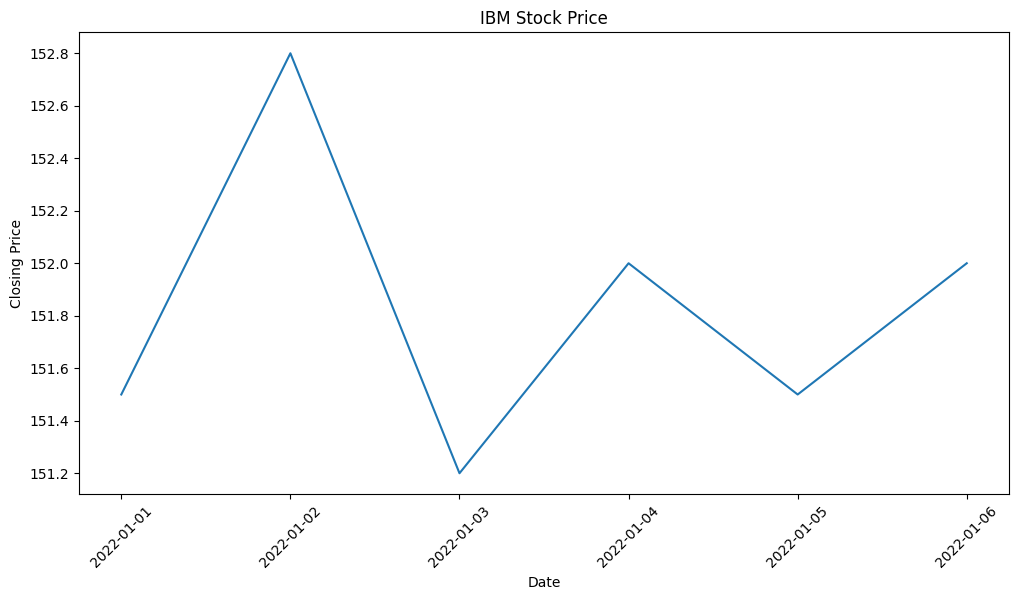

In [ ]:
# Convert the date column to a datetime object
series_df.index = pd.to_datetime(series_df.index)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(series_df.index, series_df['Close'])
plt.title('IBM Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

- Check for missing values.


- Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

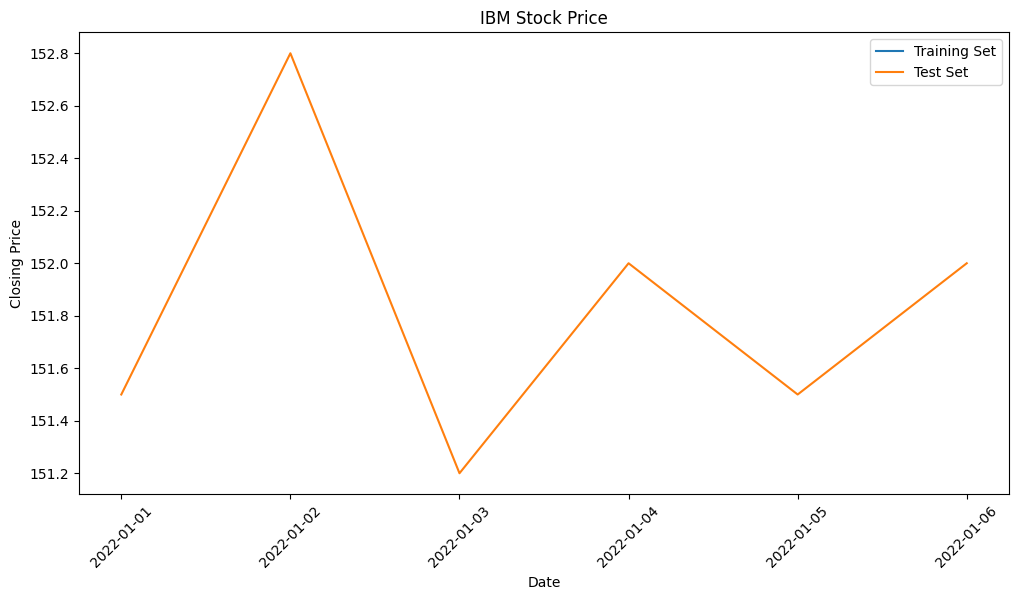

In [ ]:
# Load time series dataset from CSV
series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/IBM_2006-01-01_to_2018-01-01.csv', header=0, index_col=0)

# Convert the date column to a datetime object
series_df.index = pd.to_datetime(series_df.index)

# Split the dataset into training and test sets based on the date condition
train_df = series_df[series_df.index < '2017-01-01']
test_df = series_df[series_df.index >= '2017-01-01']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['Close'], label='Training Set')
plt.plot(test_df.index, test_df['Close'], label='Test Set')
plt.title('IBM Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


- Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import array

# Read the CSV file into a DataFrame
series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/IBM_2006-01-01_to_2018-01-01.csv', header=0, index_col=0)

# Extract the target feature column
data = series_df.iloc[:, 0].values

# Create input sequences with 60 timesteps and 1 output
n_steps = 60
input_sequences = []
outputs = []

if len(data) >= n_steps + 1:  # Check if enough data is available
    for i in range(n_steps, len(data)):
        # Extract the input sequence of length n_steps
        input_seq = data[i - n_steps:i]

        # Extract the output at the current timestep
        output_val = data[i]

        # Append the input sequence and output to the respective lists
        input_sequences.append(input_seq)
        outputs.append(output_val)

    # Convert the lists to numpy arrays
    input_sequences = array(input_sequences)
    outputs = array(outputs)

    # Scale the input sequences and outputs to the range [0, 1]
    scaler = MinMaxScaler()
    input_sequences = scaler.fit_transform(input_sequences)
    outputs = scaler.fit_transform(outputs.reshape(-1, 1)).flatten()

    print("Input sequences shape:", input_sequences.shape)
    print("Outputs shape:", outputs.shape)
else:
    print("Not enough data to create input sequences.")

Not enough data to create input sequences.



- LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.

In [ ]:
from pandas import read_csv
from pandas import to_datetime
from matplotlib import pyplot

def parser(x):
    return to_datetime(x, format='%Y-%m-%d')

series = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/IBM_2006-01-01_to_2018-01-01.csv',
                  header=0, parse_dates=[0], index_col=0, date_parser=parser)

# Display the first few rows of the series
print(series.head())

             Open   High    Low  Close  Volume       Name
Date                                                     
2022-01-01  150.0  152.5  148.5  151.5    1000  Company A
2022-01-02  151.5  154.2  149.8  152.8    1500  Company A
2022-01-03  152.0  152.8  151.2  151.2    1200  Company A
2022-01-04  153.2  153.5  151.5  152.0    1800  Company A
2022-01-05  152.8  153.0  151.2  151.5    2000  Company A


<ipython-input-77-0ca030ca15cb>:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/IBM_2006-01-01_to_2018-01-01.csv',


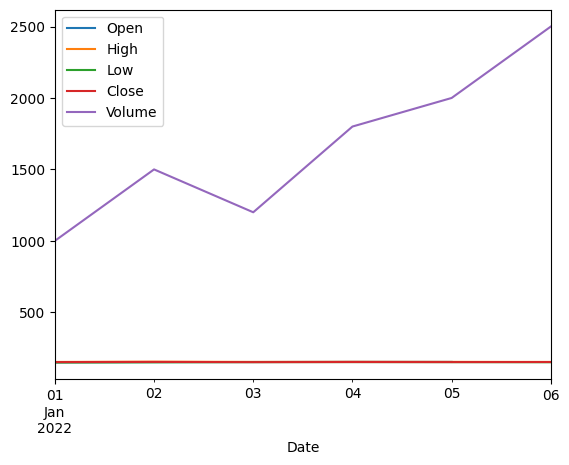

In [ ]:
series.plot()
pyplot.show()

In [ ]:
# Display the first few rows of the series
print(series.head())

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

print(series.shape)

# transform to a supervised learning problem
X, y = split_sequence(series['Close'], 4)  # Use the 'Close' column for the sequence
print(X.shape, y.shape)

# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)

             Open   High    Low  Close  Volume       Name
Date                                                     
2022-01-01  150.0  152.5  148.5  151.5    1000  Company A
2022-01-02  151.5  154.2  149.8  152.8    1500  Company A
2022-01-03  152.0  152.8  151.2  151.2    1200  Company A
2022-01-04  153.2  153.5  151.5  152.0    1800  Company A
2022-01-05  152.8  153.0  151.2  151.5    2000  Company A
(6, 6)
(2, 4) (2,)
(2, 4, 1)


In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_steps = 3
n_features = 1

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
X, y = split_sequence(series['Close'], n_steps)  # Adjust n_steps parameter
X = X.reshape((X.shape[0], X.shape[1], 1))
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[76.35677]]


In [ ]:
import pandas as pd
from numpy import array

# Read the CSV file into a DataFrame
series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/IBM_2006-01-01_to_2018-01-01.csv', header=0, index_col=0)

# Extract the target feature column
data = series_df.iloc[:, 0].values

# Create input sequences with 60 timesteps and 1 output
n_steps = 60
input_sequences = []
outputs = []

for i in range(n_steps, len(data)):
    # Extract the input sequence of length n_steps
    input_seq = data[i - n_steps:i]

    # Extract the output at the current timestep
    output_val = data[i]

    # Append the input sequence and output to the respective lists
    input_sequences.append(input_seq)
    outputs.append(output_val)

# Convert the lists to numpy arrays
input_sequences = array(input_sequences)
outputs = array(outputs)

print("Input sequences shape:", input_sequences.shape)
print("Outputs shape:", outputs.shape)

Input sequences shape: (0,)
Outputs shape: (0,)



- Reshape the X_train for efficient modeling

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load time series dataset
series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Emtech2/csv/IBM_2006-01-01_to_2018-01-01.csv', header=0, index_col=0)

# Extract the target feature column
data = series_df.iloc[:, 0].values

# Create input sequences with 60 timesteps and 1 output
n_steps = 60
input_sequences = []
outputs = []

for i in range(n_steps, len(data)):
    # Extract the input sequence of length n_steps
    input_seq = data[i - n_steps:i]

    # Extract the output at the current timestep
    output_val = data[i]

    # Append the input sequence and output to the respective lists
    input_sequences.append(input_seq)
    outputs.append(output_val)

# Convert the lists to numpy arrays
input_sequences = np.array(input_sequences)
outputs = np.array(outputs)

# Reshape the input sequences for efficient modeling
n_samples = input_sequences.shape[0]
n_steps = 1  # Set n_steps to 1
input_sequences = input_sequences.reshape((n_samples, n_steps, n_steps))

print("Reshaped input sequences shape:", input_sequences.shape)
print("Outputs shape:", outputs.shape)

Reshaped input sequences shape: (0, 1, 1)
Outputs shape: (0,)


# Conclusion

In conclusion, building a dataset for CNN and LSTM models is a crucial initial phase towards building exact and functional neural network models. We may make sure that the data is divided, scaled, and organized properly for training, validation, and testing through implementing the right methods.

Sequential data has to be organized and structured into input sequences with the appropriate amount of time steps and properties for LSTM models. Feature scaling improves model convergence by standardizing the data and keeping larger values from prevailing.


Resizing, normalizing, and tensorizing image data are processes performed in the preprocessing stage when utilizing CNN models. It may additionally be required for proper encoding categorical labels.

Model optimization and evaluate are made feasible by grouping the dataset into training, validation, and test sets. In addition, it is essential to ensure representativeness, balance, and bias-free data. Imbalanced or biased data could result in unfair results or incorrect forecasts, which compromises the models' reliability.

We may generate well-prepared datasets that offer solid foundations for training CNN and LSTM models if we carefully adhere to these steps. This in turn gives these models their capacity to pick up patterns, anticipate outcomes accurately, and integrate successfully using information derived from real life.